# Домашнее задание по теме «Функции потерь и оптимизация»

1. Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
2. Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее: Методом nesterov momentum и Методом rmsprop
3. Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [12]:
import numpy as np
import random
import pylab
from scipy import stats
import pylab as pl
import mpl_toolkits


import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# Data

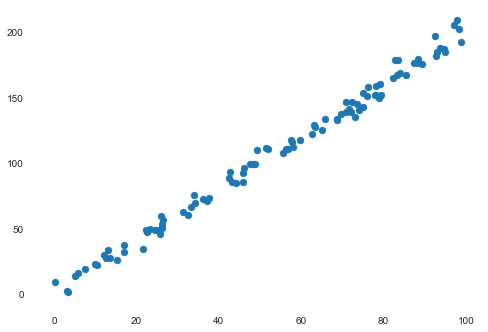

In [14]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

# Nesterov

In [15]:
EPOCHS = 30
LEARNING_RATE = 0.00005
gamma = 0.9

costs = []
params = []
preds = []
v = [0,0]

params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    v[0] = v[0] * gamma + LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    v[1] = v[1] * gamma + LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions) 
    
    params[0] = params[0] - v[0]
    params[1] = params[1] - v[1]

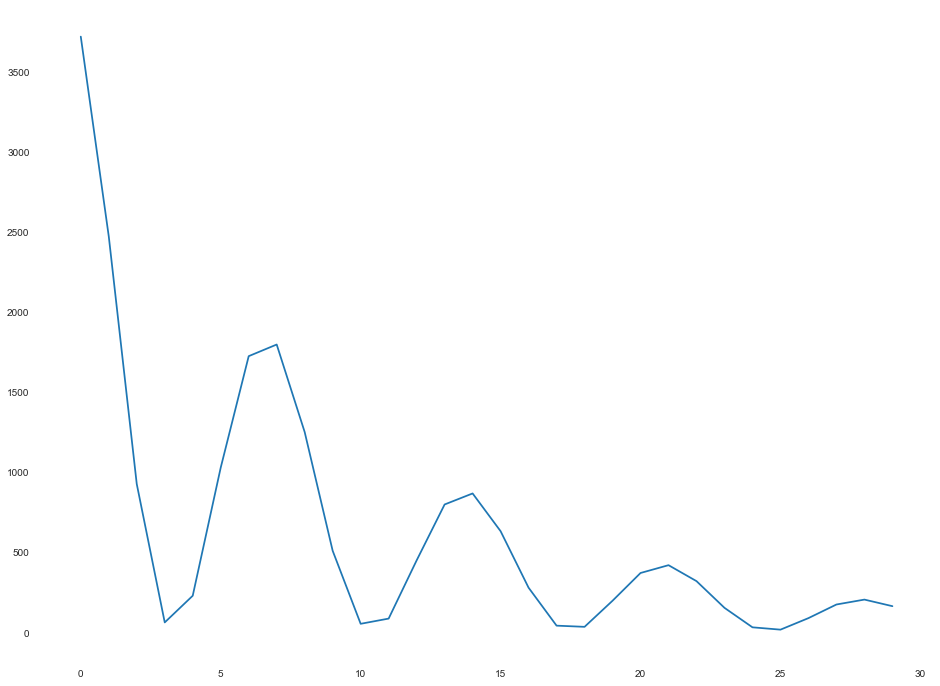

In [16]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

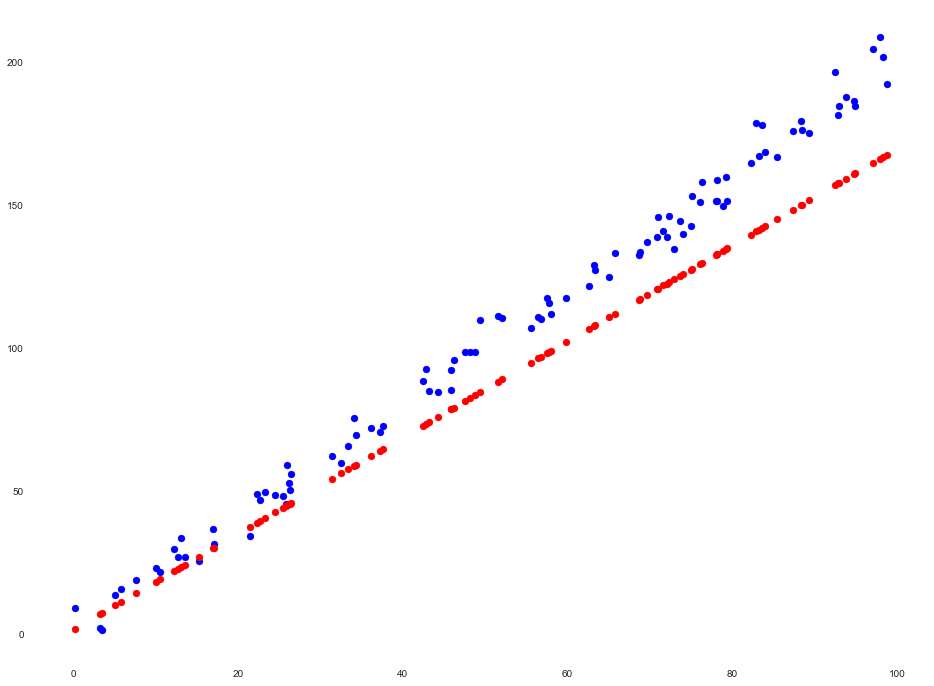

In [17]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[27], color='red')
plt.show()

In [18]:
params

array([1.5631368, 1.7765837])

# rmsprop

In [19]:
EPOCHS = 30
LEARNING_RATE = 0.1
gamma = 0.9

costs = []
params = []
preds = []
EG = [0,0]
eps  = 0.000001

params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
  
    EG[0] = gamma * EG[0] + (1 - gamma) * (np.sum(predictions - Y) / len(predictions)) ** 2
    EG[1] = gamma * EG[1] + (1 - gamma) * (np.sum((predictions - Y) * X) / len(predictions)) ** 2    
    
    params[0] = params[0] - LEARNING_RATE / np.sqrt(EG[0] + eps) * (np.sum(predictions - Y) / len(predictions))
    params[1] = params[1] - LEARNING_RATE / np.sqrt(EG[1] + eps) * (np.sum((predictions - Y) * X) / len(predictions))

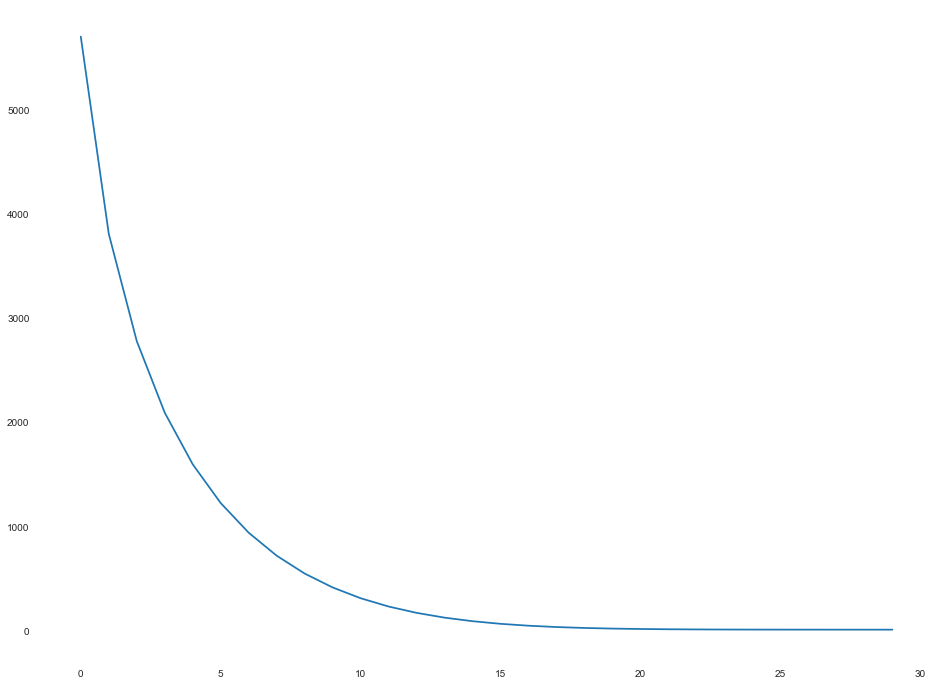

In [20]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

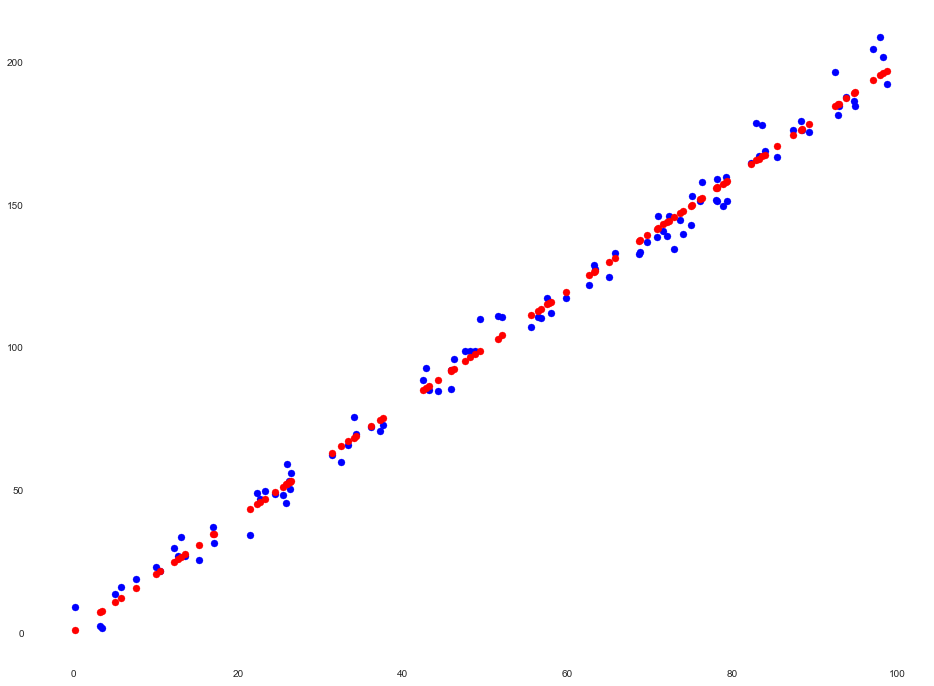

In [21]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[29], color='red')
plt.show()

In [22]:
params

array([0.73511285, 1.98921851])

# Задание со звездочкой 

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(np.concatenate((iris.data, iris.target[:, None]), axis=1))

data = df[df[4] != 1].iloc[:,:4].values
target = df[df[4] != 1].apply(lambda x: x / 2).iloc[:,4].values

In [28]:
data = np.c_[ np.ones(data.shape[0]), df[df[4] != 1].iloc[:,:4].values]

# Nesterov

In [29]:
EPOCHS = 50
LEARNING_RATE = 0.01

momentum = 0.9
velocity_param = np.zeros_like(data.shape[1])

costs = []
params = []
preds = []

m = data.shape[0]
params = np.ones(data.shape[1])

for _ in range(EPOCHS):
    predictions = 1/(1+np.exp(-1*(np.dot(data, params))))
    preds.append(predictions)
    
    cost = -(1 / m) * np.sum(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))
    costs.append(cost)
    
    predictions_ahead = 1/(1+np.exp(-1*(np.dot(data, params - momentum * velocity_param))))
    
    velocity_param = momentum * velocity_param + LEARNING_RATE * (1 / m) * np.dot(data.T, predictions_ahead - target)
    
    params -= velocity_param

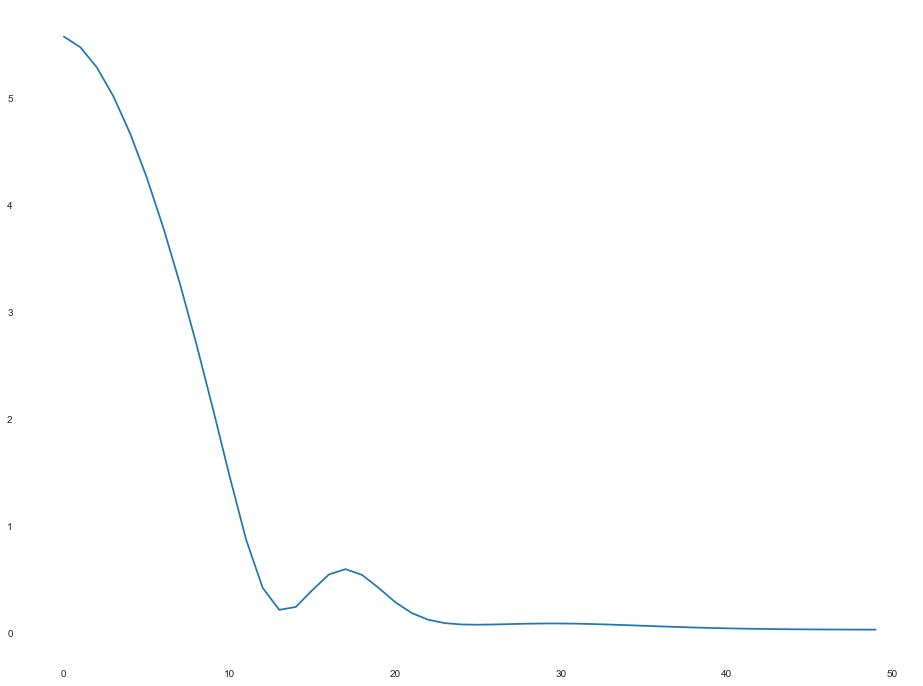

In [30]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [31]:
params

array([ 0.55139061, -0.82711411, -0.64247452,  1.37609547,  1.33249436])

# rmsprop

In [33]:
EPOCHS = 50
LEARNING_RATE = 0.01

gamma = 0.9
cache_param = np.zeros_like(data.shape[1])
eps = 1e-8

costs = []
params = []
preds = []

m = data.shape[0]
params = np.ones(data.shape[1])

for _ in range(EPOCHS):
    predictions = 1/(1+np.exp(-1*(np.dot(data, params))))
    preds.append(predictions)
    
    cost = -(1 / m) * np.sum(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))
    costs.append(cost)
    
    cache_param =  gamma * cache_param + (1 - gamma) * (np.square(np.sum(predictions - target) / len(predictions)))
    
    grad_param = (1 / m) * np.dot(data.T, predictions - target)
    
    params -= LEARNING_RATE * grad_param / (np.sqrt(cache_param) + eps)

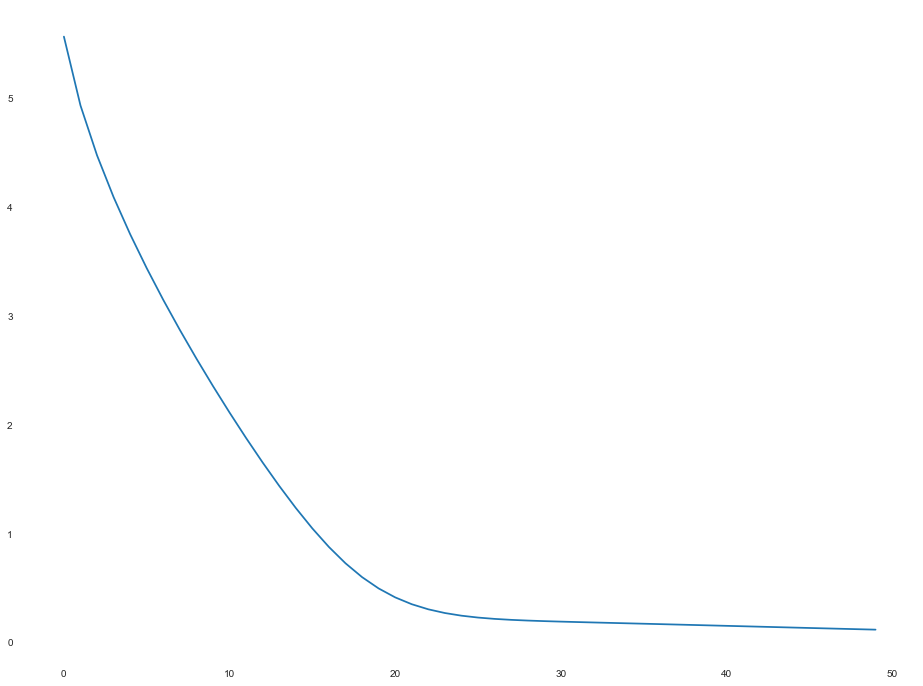

In [34]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [35]:
params

array([ 0.64548627, -0.63452598, -0.24909741,  0.82053214,  1.05701149])